In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# To ignore warning messages
import warnings
warnings.filterwarnings('ignore')
# Adult dataset path
adult_dataset_path = "/content/adult.csv"
# Function for loading adult dataset
def load_adult_data(adult_path=adult_dataset_path):
            csv_path = os.path.join(adult_path)
            return pd.read_csv(csv_path)

In [3]:
# Calling load adult function and assigning to a new variable df
df = load_adult_data()
# load top 3 rows values from adult dataset
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [4]:
print ("Rows : " ,df.shape[0])
print ("Columns : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values : ", df.isnull().sum().values.sum())
print ("\nUnique values : \n",df.nunique())

Rows :  48842
Columns :  15

Features : 
 ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

Missing values :  0

Unique values : 
 age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
# checking "?" total values present in particular 'workclass' feature
df_check_missing_workclass = (df['workclass']=='?').sum()
df_check_missing_workclass

2799

In [9]:
# checking "?" total values present in particular 'occupation' feature
df_check_missing_occupation = (df['occupation']=='?').sum()
df_check_missing_occupation

2809

In [10]:
# checking "?" values, how many are there in the whole dataset
df_missing = (df=='?').sum()
df_missing

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
percent_missing = (df=='?').sum() * 100/len(df)
percent_missing

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [12]:
# find total number of rows which doesn't contain any missing value as '?'
df.apply(lambda x: x !='?',axis=1).sum()

age                48842
workclass          46043
fnlwgt             48842
education          48842
educational-num    48842
marital-status     48842
occupation         46033
relationship       48842
race               48842
gender             48842
capital-gain       48842
capital-loss       48842
hours-per-week     48842
native-country     47985
income             48842
dtype: int64

In [13]:
# dropping the rows having missing values in workclass
df = df[df['workclass'] !='?']
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [14]:
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
# checking whether any other column contains '?' value
df_categorical.apply(lambda x: x=='?',axis=1).sum()

workclass           0
education           0
marital-status      0
occupation         10
relationship        0
race                0
gender              0
native-country    811
income              0
dtype: int64

In [16]:
from sklearn import preprocessing
# encode categorical variables using label Encoder
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()


,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [17]:
# apply label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,2,1,4,6,3,2,1,39,0
1,2,11,2,4,0,4,1,39,0
2,1,7,2,10,0,4,1,39,1
3,2,15,2,6,0,2,1,39,1
5,2,0,4,7,1,4,1,39,0


In [18]:
# Next, Concatenate df_categorical dataframe with original df (dataframe)
# first, Drop earlier duplicate columns which had categorical values
df = df.drop(df_categorical.columns,axis=1)
df = pd.concat([df,df_categorical],axis=1)
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,25,226802,7,0,0,40,2,1,4,6,3,2,1,39,0
1,38,89814,9,0,0,50,2,11,2,4,0,4,1,39,0
2,28,336951,12,0,0,40,1,7,2,10,0,4,1,39,1
3,44,160323,10,7688,0,40,2,15,2,6,0,2,1,39,1
5,34,198693,6,0,0,30,2,0,4,7,1,4,1,39,0


In [19]:
# look at column type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46033 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              46033 non-null  int64
 1   fnlwgt           46033 non-null  int64
 2   educational-num  46033 non-null  int64
 3   capital-gain     46033 non-null  int64
 4   capital-loss     46033 non-null  int64
 5   hours-per-week   46033 non-null  int64
 6   workclass        46033 non-null  int64
 7   education        46033 non-null  int64
 8   marital-status   46033 non-null  int64
 9   occupation       46033 non-null  int64
 10  relationship     46033 non-null  int64
 11  race             46033 non-null  int64
 12  gender           46033 non-null  int64
 13  native-country   46033 non-null  int64
 14  income           46033 non-null  int64
dtypes: int64(15)
memory usage: 5.6 MB


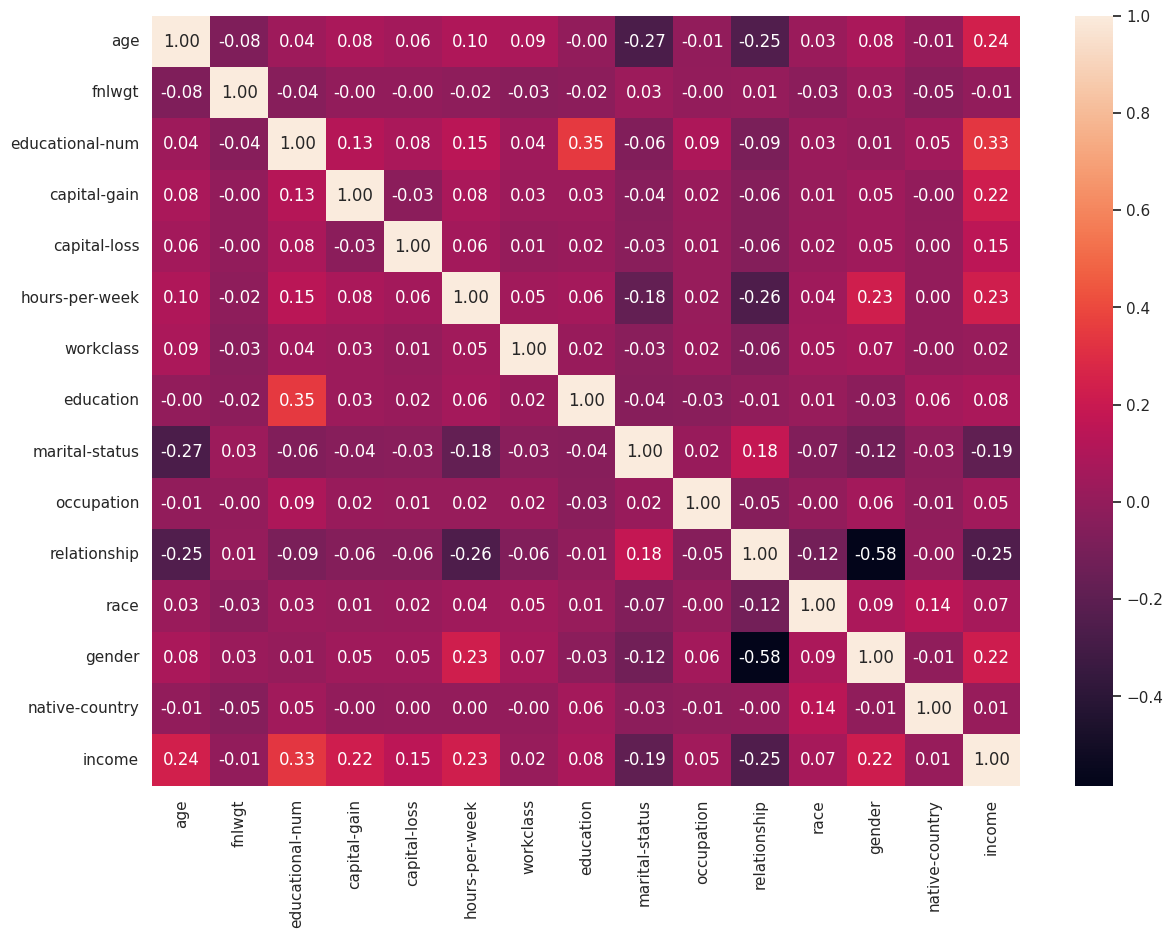

In [20]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

In [21]:
# convert target variable income to categorical
df['income'] = df['income'].astype('category')
# check df info again whether everything is in right format or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46033 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              46033 non-null  int64   
 1   fnlwgt           46033 non-null  int64   
 2   educational-num  46033 non-null  int64   
 3   capital-gain     46033 non-null  int64   
 4   capital-loss     46033 non-null  int64   
 5   hours-per-week   46033 non-null  int64   
 6   workclass        46033 non-null  int64   
 7   education        46033 non-null  int64   
 8   marital-status   46033 non-null  int64   
 9   occupation       46033 non-null  int64   
 10  relationship     46033 non-null  int64   
 11  race             46033 non-null  int64   
 12  gender           46033 non-null  int64   
 13  native-country   46033 non-null  int64   
 14  income           46033 non-null  category
dtypes: category(1), int64(14)
memory usage: 5.3 MB


In [22]:
# Importing train_test_split
from sklearn.model_selection import train_test_split
# Putting independent variables/features to X
X = df.drop('income',axis=1)
# Putting response/dependent variable/feature to y
y = df['income']
X.head(3)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,25,226802,7,0,0,40,2,1,4,6,3,2,1,39
1,38,89814,9,0,0,50,2,11,2,4,0,4,1,39
2,28,336951,12,0,0,40,1,7,2,10,0,4,1,39


In [23]:
y.head(3)

0    0
1    0
2    1
Name: income, dtype: category
Categories (2, int64): [0, 1]

In [24]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y)
X_train.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,gender,native-country
13554,58,196502,10,0,0,60,2,15,2,11,0,4,1,39
46282,27,297457,9,0,0,40,2,11,4,0,3,2,1,39
25679,27,30244,9,0,0,80,4,11,4,4,3,4,1,39
8775,42,165309,9,0,0,50,2,11,4,5,1,4,1,39
13211,68,140892,14,0,0,15,4,12,2,13,0,4,1,39


In [26]:
test_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
# Params for Random Forest
num_trees = 100
max_features = 3

In [32]:
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, predictions)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 85.44617256060475%
[[8015  628]
 [1047 1819]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      8643
           1       0.74      0.63      0.68      2866

    accuracy                           0.85     11509
   macro avg       0.81      0.78      0.80     11509
weighted avg       0.85      0.85      0.85     11509

